In [80]:
from QCircuit import *
import numpy as np
from matplotlib import pyplot as plt
from scipy import constants
%matplotlib inline

GND
[[0 0 0]
 [1 1 0]
 [2 0 0]
 [0 0 1]]
-50000000000.0*cos(phi1 - phi2) - 50000000000.0*cos(phi1 + phi2) - 40000000000.0*cos(2*phi1 - phi3) + 140000000000.0
0.e-114
8192
256
8
8


/usr/local/lib/python3.4/dist-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/lib/python3/dist-packages/matplotlib/figure.py:372: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


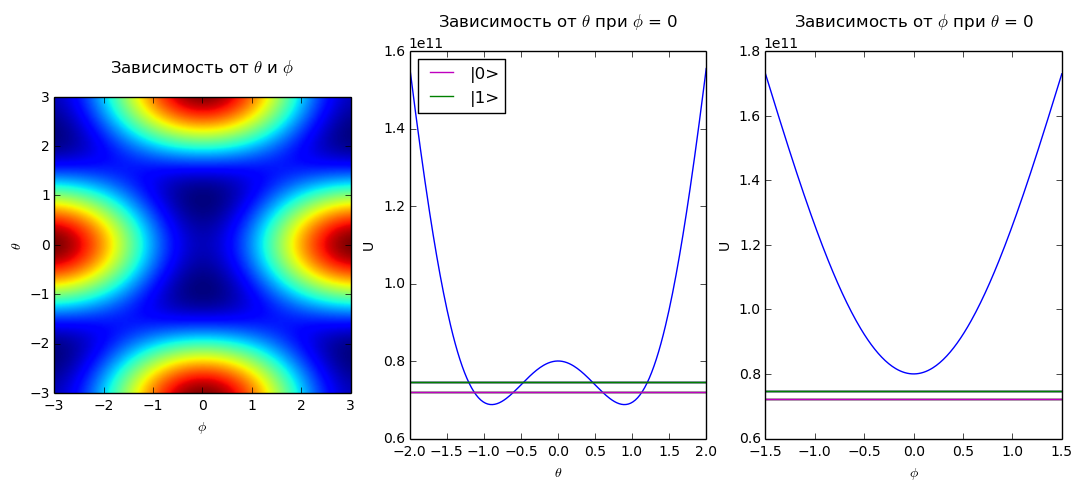

In [82]:
Simple = QCircuit()
Simple.add_element(QJosephsonJunction('JJ1'),['GND','1'])
Simple.add_element(QJosephsonJunction('JJ2'),['1','2'])
Simple.add_element(QJosephsonJunction('JJ3'),['2','3'])

Simple.add_element(QCapacitance('C1'),['GND','1'])
Simple.add_element(QCapacitance('C2'),['1','2'])
Simple.add_element(QCapacitance('C3'),['2','3'])


phi1 = QVariable('phi1')
phi2 = QVariable('phi2')
phi3 = QVariable('phi3')

phi1.create_grid(32,1)
phi2.create_grid(32,1)
phi3.set_parameter(np.pi,0)

Simple.add_variable(phi1)
Simple.add_variable(phi2)
Simple.add_variable(phi3)
Ej = 50*1e9
Ec = 1*1e9
Simple.find_element('JJ1').set_critical_current(Ej)
Simple.find_element('JJ2').set_critical_current(Ej)
Simple.find_element('C1').set_capacitance(2/Ec)
Simple.find_element('C2').set_capacitance(2/Ec)
alpha = 0.8
Simple.find_element('JJ3').set_critical_current(Ej*alpha)
Simple.find_element('C3').set_capacitance(2/Ec/alpha)
alpha_steps = 3
flux_steps = 16
energies = np.zeros((alpha_steps,8), dtype=np.complex128)
wavefunctions = np.zeros((alpha_steps,2), dtype=np.complex128)
print(Simple.nodes[0].name)
Simple.map_nodes_linear(['GND', '1', '2', '3'], 
                       ['phi1', 'phi2', 'phi3'], 
                       np.asarray([[0,0,0],[1,1,0],[2,0,0],[0,0,1]]))

print(Simple.linear_coordinate_transform)
U = Simple.symbolic_hamiltonian(False)
print(U)
print(U.evalf(subs={'phi1': 0, 'phi2': 0,'phi3' : 0}))
calc = sympy.lambdify({"phi1","phi2","phi3"},U,'numpy')

phi_steps = 256
phi_space = np.linspace(-3,3,phi_steps)

teta_steps = 256
teta_space = np.linspace(-3,3,teta_steps)

phi_grid, teta_grid = np.meshgrid(phi_space, teta_space)

calc_grid = calc(phi1 = teta_grid,phi2  = phi_grid, phi3 = np.pi)
fig = plt.figure(figsize=(13,5),dpi=300)
#fig.suptitle('Потенциальная энергия 3JJ кубита'+'\n'+'\n'+'\n',fontsize = 14)
grid = fig.add_subplot(131)
grid.set_title(r'Зависимость от $\theta$ и $\phi$'+'\n')
grid.set_xlabel(r'$\phi$')
grid.set_ylabel(r'$\theta$')
#grid.set_ylim([-3,3])
grid.imshow(calc_grid, extent=[-3,3,-3,3])
theta_plot = fig.add_subplot(132)
phi_plot = fig.add_subplot(133)
theta_plot.set_title(r'Зависимость от $\theta$ при $\phi$ = 0'+'\n')
phi_plot.set_title(r'Зависимость от $\phi$ при $\theta$ = 0'+'\n')
theta_plot.set_xlabel(r'$\theta$')
theta_plot.set_ylabel(r'U')
#theta_plot.set_ylim([1.2,3.1])
theta_plot.set_xlim([-2,2])
#theta_plot.set_ylim([0,4.5])
phi_plot.set_xlabel(r'$\phi$')
phi_plot.set_ylabel(r'U')

teta_space_shrinked = np.linspace(-2,2,teta_steps)
phi_space_shrinked = np.linspace(-1.5,1.5,phi_steps)

calc_teta_space = calc(phi1 = teta_space_shrinked, phi2 = 0, phi3 = np.pi)
calc_phi_space  = calc(phi1 = 0, phi2 = phi_space_shrinked, phi3 = np.pi)
theta_plot.plot(teta_space_shrinked, calc_teta_space)
phi_plot.plot(phi_space_shrinked, calc_phi_space)
#for node_id, node in enumerate(Simple.nodes):
#            print(node.phase_symbol)
for alpha_id, alpha in enumerate(np.linspace(0.7,0.9,alpha_steps)):
    Simple.calculate_potentials()
    [eigenenergies,eigenfunctions] = Simple.diagonalize_phase(num_states=8)
    energies[alpha_id, :] = eigenenergies
print(eigenfunctions.size)
print(eigenfunctions[0].size)
print(eigenfunctions[0][0].size)
print(eigenfunctions[0][0][0].size)
#energies2 = [2.26318559e+09, 3.36693909e+09]
for energy_id, energy in enumerate(energies[1,:]):
    phi_plot.plot(phi_space_shrinked, energy*np.ones_like(phi_space_shrinked))
    if energy_id == 3 or energy_id == 7:
        theta_plot.plot(teta_space_shrinked, energy*np.ones_like(teta_space_shrinked), label = "|"+str(int((energy_id-3)/4))+">")
    else:
        theta_plot.plot(teta_space_shrinked, energy*np.ones_like(teta_space_shrinked))
theta_plot.legend(bbox_to_anchor = [0,1], loc = "upper left")
fig.show()

In [79]:
print(energies[1,:])

[  7.20445014e+10 +1.39472559e-06j   7.20445014e+10 -3.05821231e-07j
   7.20445014e+10 +1.75056524e-06j   7.20445014e+10 +1.60817649e-06j
   7.46072100e+10 +1.81142844e-06j   7.46072100e+10 +1.55377764e-06j
   7.46072119e+10 +1.32611425e-06j   7.46072119e+10 +1.22078924e-06j]


In [14]:
print(Simple.symbolic_hamiltonian())

0.5*Uphi3*(Uphi3/4062500000 - 4*nphi1/13) + 0.5*nphi1*(-4*Uphi3/13 + 5000000000*nphi1/13) + 500000000.0*nphi2**2 - 1000000000.0*cos(phi1 - phi2) - 1000000000.0*cos(phi1 + phi2) - 800000000.0*cos(2*phi1 + phi3) + 2800000000.0
